In [2]:
!pip install easyocr opencv-python opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 25.7 MB/s eta 0:00:00


In [ ]:
!pip install opencv-python

### Text bounding and text erasing using OpenCV **INPAINT_TELEA**

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete([[278, 417], [729, 417], [729, 486], [278, 486]], 'devuda nenu,naa', 0.9182165838780332)
([[206, 474], [800, 474], [800, 546], [206, 546]], 'frnds followers andaru', 0.7671010718914033)
([[750, 572], [832, 572], [832, 600], [750, 600]], '@sree', 0.9749974388952911)
([[850, 566], [926, 566], [926, 598], [850, 598]], 'talks', 0.9999014788234251)
([[117, 1085], [606, 1085], [606, 1161], [117, 1161]], 'Swarganike vellali', 0.9584124199111317)
([[33.316718427000254, 39.65835921350013], [84.76751647234832, 12.575977409350868], [97.68328157299975, 37.34164078649987], [46.232483527651674, 65.42402259064913]], 'ISREE ,', 0.08493153508797856)
([[94.388137237664, 11.063058740787184], [154.9969971632357, 38.86580609716855], [142.61186276233602, 64.93694125921282], [82.0030028367643, 36.13419390283145]], 'TTALKS', 0.4080674846983685)


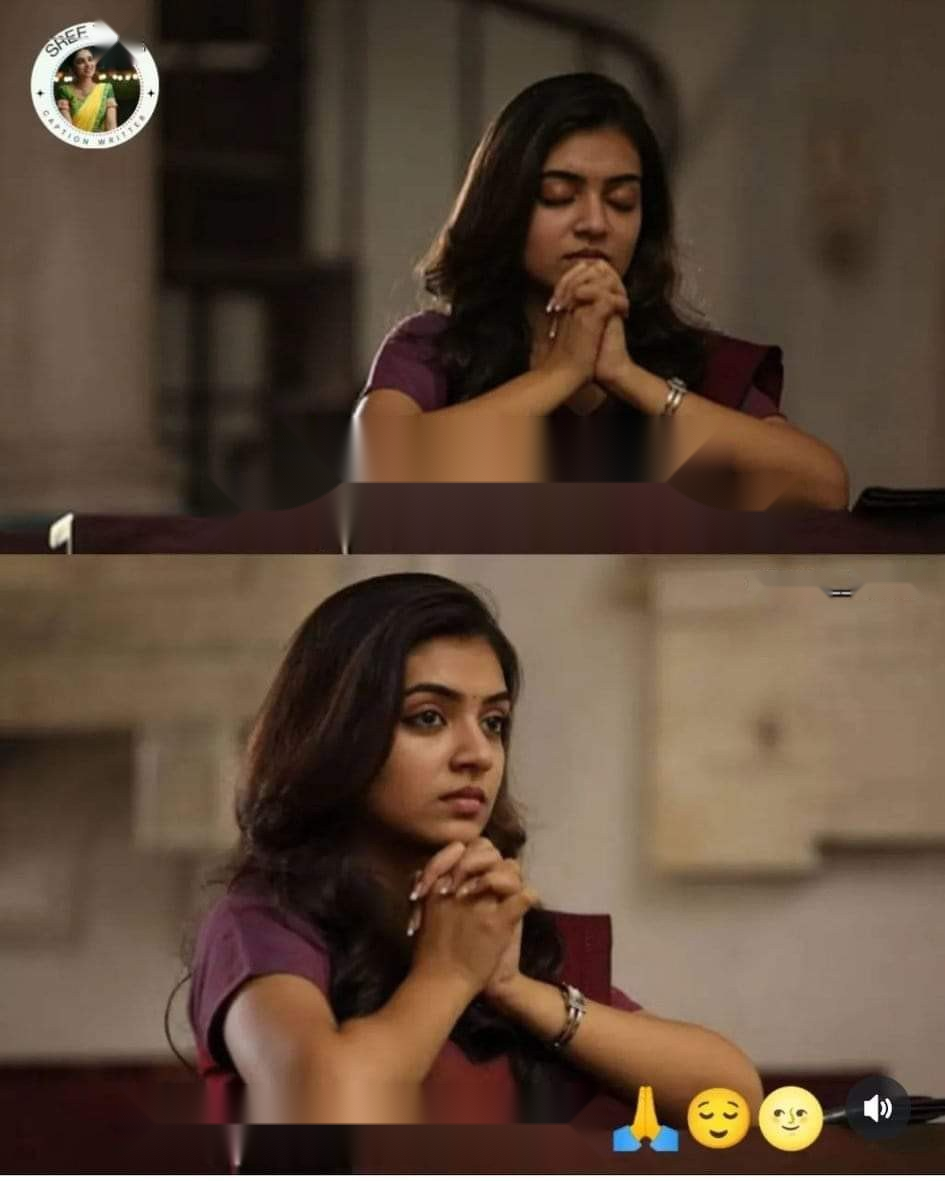

In [3]:
import cv2
import numpy as np
import easyocr
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/image.jpg')

# Convert the image to RGB format (EasyOCR expects RGB, not BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use EasyOCR for text detection
reader = easyocr.Reader(['en'])
results = reader.readtext(image_rgb)

# Print the detected results
for result in results:
    print(result)

# Create a mask for the detected text
mask = np.zeros(image.shape[:2], dtype=np.uint8)
for (bbox, text, prob) in results:
    (x_min, y_min), (x_max, y_max) = bbox[0], bbox[2]
    cv2.rectangle(mask, (int(x_min), int(y_min)), (int(x_max), int(y_max)), 255, -1)

# Inpaint the masked area
inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Save or display the result
cv2.imwrite('image_without_text.jpg', inpainted_image)
cv2_imshow(inpainted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Text bounding and text extraction


([[278, 417], [729, 417], [729, 486], [278, 486]], 'devuda nenu,naa', 0.9182165838780332)
([[206, 474], [800, 474], [800, 546], [206, 546]], 'frnds followers andaru', 0.7671010718914033)
([[750, 572], [832, 572], [832, 600], [750, 600]], '@sree', 0.9749974388952911)
([[850, 566], [926, 566], [926, 598], [850, 598]], 'talks', 0.9999014788234251)
([[117, 1085], [606, 1085], [606, 1161], [117, 1161]], 'Swarganike vellali', 0.9584124199111317)
([[33.316718427000254, 39.65835921350013], [84.76751647234832, 12.575977409350868], [97.68328157299975, 37.34164078649987], [46.232483527651674, 65.42402259064913]], 'ISREE ,', 0.08493153508797856)
([[94.388137237664, 11.063058740787184], [154.9969971632357, 38.86580609716855], [142.61186276233602, 64.93694125921282], [82.0030028367643, 36.13419390283145]], 'TTALKS', 0.4080674846983685)


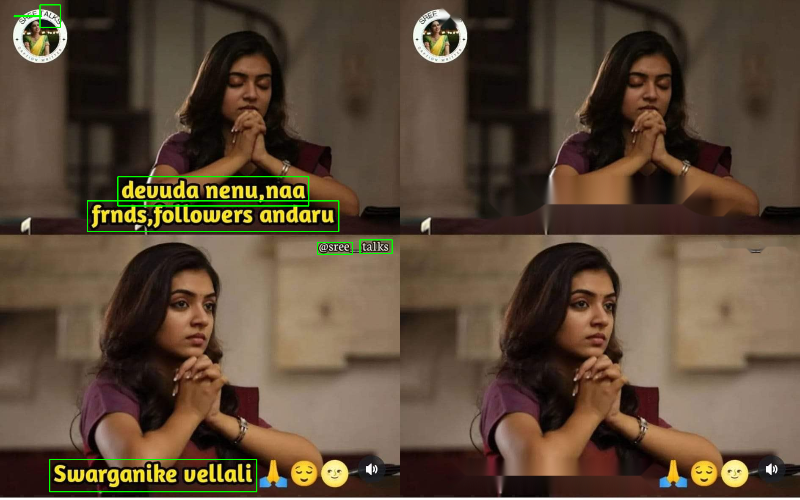

In [4]:
import cv2
import numpy as np
import easyocr
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/image.jpg')

# Convert the image to RGB format (EasyOCR expects RGB, not BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use EasyOCR for text detection
reader = easyocr.Reader(['en'])
results = reader.readtext(image_rgb)

# Print the detected results
for result in results:
    print(result)

# Create a copy of the image for drawing bounding boxes
bounding_image = image.copy()

# Create a mask for the detected text
mask = np.zeros(image.shape[:2], dtype=np.uint8)
for (bbox, text, prob) in results:
    (x_min, y_min), (x_max, y_max) = bbox[0], bbox[2]
    # Draw the bounding boxes on the copied image
    cv2.rectangle(bounding_image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
    # Fill the mask for inpainting
    cv2.rectangle(mask, (int(x_min), int(y_min)), (int(x_max), int(y_max)), 255, -1)

# Inpaint the masked area
inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Resize both images to the same height
height = 500
bounding_image_resized = cv2.resize(bounding_image, (int(bounding_image.shape[1] * height / bounding_image.shape[0]), height))
inpainted_image_resized = cv2.resize(inpainted_image, (int(inpainted_image.shape[1] * height / inpainted_image.shape[0]), height))

# Place images side by side
side_by_side = np.hstack((bounding_image_resized, inpainted_image_resized))

# Save the resulting image
cv2.imwrite('image_side_by_side.jpg', side_by_side)

# Display the side-by-side image
cv2_imshow(side_by_side)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Text Extracting

In [ ]:
import cv2
import easyocr

# Load the image
image = cv2.imread('/content/image.jpg')

# Convert the image to RGB format (EasyOCR expects RGB, not BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use EasyOCR for text detection
reader = easyocr.Reader(['en'])
results = reader.readtext(image_rgb)

# Prepare a list to store the extracted text
extracted_text = []

# Print and collect the detected results
for result in results:
    text = result[1]  # Extract the detected text
    print(text)  # Print to console
    extracted_text.append(text)  # Save to list

# Save the extracted text to a file
with open('extracted_text.txt', 'w') as file:
    for line in extracted_text:
        file.write(f"{line}\n")

print("Extracted text has been saved to 'extracted_text.txt'")


devuda nenu,naa
frnds followers andaru
@sree
talks
Swarganike vellali
ISREE ,
TTALKS
Extracted text has been saved to 'extracted_text.txt'


In [6]:
import cv2
import easyocr

# Load the image
image = cv2.imread('/content/logo_2.png')

# Convert the image to RGB format (EasyOCR expects RGB, not BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use EasyOCR for text detection
reader = easyocr.Reader(['en'])
results = reader.readtext(image_rgb)

# Prepare a list to store the extracted text
extracted_text = []

# Print and collect the detected results
for result in results:
    text = result[1]  # Extract the detected text
    print(text)  # Print to console
    extracted_text.append(text)  # Save to list

# Save the extracted text to a file
with open('extracted_text.txt', 'w') as file:
    for line in extracted_text:
        file.write(f"{line}\n")

print("Extracted text has been saved to 'extracted_text.txt'")

This Logo
This
This Logo
ogo
Extracted text has been saved to 'extracted_text.txt'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For Multiple

In [ ]:
import os
import cv2
import easyocr

# Path to the folder containing images
input_folder = '/content/drive/MyDrive/Colab Notebooks/text_extract'  # Update with your folder path
output_file = 'extracted_text.txt'

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Prepare to save all extracted text
with open(output_file, 'w') as file:
    # Loop through all files in the folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            image_path = os.path.join(input_folder, filename)

            # Load and process the image
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Extract text using EasyOCR
            results = reader.readtext(image_rgb)
            file.write(f"Results for {filename}:\n")  # Header for each image

            for result in results:
                text = result[1]  # Extract detected text
                file.write(f"{text}\n")  # Write text to file
                print(f"{filename}: {text}")  # Print to console for monitoring

            file.write("\n")  # Add a blank line between results

print(f"Text extracted from all images has been saved to '{output_file}'.")


logo_2.png: This Logo
logo_2.png: This
logo_2.png: This Logo
logo_2.png: ogo
logo.png: ThisLogo
image.jpg: devuda nenu,naa
image.jpg: frnds followers andaru
image.jpg: @sree
image.jpg: talks
image.jpg: Swarganike vellali
image.jpg: ISREE ,
image.jpg: TTALKS
Text extracted from all images has been saved to 'extracted_text.txt'.
